In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [37]:
import seaborn as sns

In [71]:
import matplotlib.cm as cm

In [4]:
yellow_2018_06=pd.read_csv('yellow_tripdata_2018-06.csv',encoding='latin1')

In [5]:
taxi_zones=pd.read_csv('taxi_zone_lookup.csv',encoding='latin1')

In [6]:
#We assume that we will take in consideration the year 2018. so june is referred as june 2018.
#We are going to plot the graph that, for each day of the month, plot the weighted mean hour for each.
#this because we started from a single month. First, we took in consideration to create a dictionary with,   
#for each day, has a list of tuples that corresponds to all the trips in the hour of that day.
#and then, we created the dict() with the day of the month and the corresponding hour's mean.

In [7]:
junedates = yellow_2018_06['tpep_pickup_datetime']

In [8]:
###########Dictionary that, for each day of the month, saves the list of all time slots and the related number of trips### 
days_hours=dict()
for el in junedates:
    el=el.split(' ')
    time=el[1]
    hour=time[:2]
    date=el[0]
    day=date[-2:]
    if day not in days_hours.keys():
        days_hours[day]=[[hour, 1]]
    else:
        updated=False
        for l in days_hours[day]:
            if l[0]==hour:
            #we update the occurrence for that hour with another trip
                l[1]+=1
                updated=True
            else:
                continue
        if updated==False:
            days_hours[day].append([hour, 1])



In [9]:
#now we will compute the weighted mean hour for each day, putting all in a dictionary with key = day and value = mean
means_dict=dict()
for key in days_hours.keys():
    product_sum=0
    denominator_sum=0
    day_list=days_hours[key]
    for el in day_list:
        product_sum+=int(el[0])*el[1]
        denominator_sum+=el[1]
    means_dict[key]=product_sum/denominator_sum

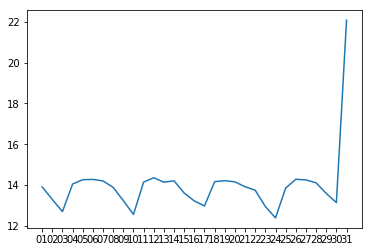

In [10]:
plt.plot(*zip(*sorted(means_dict.items())))
plt.show()

In [12]:
#we can compute something similar for each borough:

In [11]:
yellow_tz_2018_06 = yellow_2018_06.merge(taxi_zones,left_on='PULocationID', right_on='LocationID')

In [12]:
yellow_tz_2018_06

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,LocationID,Borough,Zone,service_zone
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.00,1,N,145,145,2,...,0.5,0.5,0.00,0.00,0.3,4.30,145,Queens,Long Island City/Hunters Point,Boro Zone
1,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.00,1,N,145,145,2,...,0.5,0.5,0.00,0.00,0.3,3.80,145,Queens,Long Island City/Hunters Point,Boro Zone
2,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.00,1,N,145,145,2,...,0.5,0.5,0.00,0.00,0.3,3.80,145,Queens,Long Island City/Hunters Point,Boro Zone
3,2,2018-06-01 00:34:15,2018-06-01 00:46:14,1,3.21,1,N,145,223,1,...,0.5,0.5,0.00,0.00,0.3,13.80,145,Queens,Long Island City/Hunters Point,Boro Zone
4,1,2018-06-01 00:25:25,2018-06-01 00:41:49,1,6.60,1,N,145,95,1,...,0.5,0.5,3.95,0.00,0.3,25.75,145,Queens,Long Island City/Hunters Point,Boro Zone
5,1,2018-06-01 00:17:55,2018-06-01 00:21:35,1,1.20,1,N,145,226,1,...,0.5,0.5,1.45,0.00,0.3,8.75,145,Queens,Long Island City/Hunters Point,Boro Zone
6,1,2018-06-01 00:05:31,2018-06-01 00:20:16,1,5.40,1,N,145,74,2,...,0.5,0.5,0.00,0.00,0.3,17.80,145,Queens,Long Island City/Hunters Point,Boro Zone
7,2,2018-06-01 00:20:47,2018-06-01 00:35:41,1,11.87,1,N,145,131,2,...,0.5,0.5,0.00,0.00,0.3,33.30,145,Queens,Long Island City/Hunters Point,Boro Zone
8,1,2018-06-01 00:22:46,2018-06-01 00:29:17,1,0.90,1,N,145,146,1,...,0.5,0.5,0.00,0.00,0.3,7.80,145,Queens,Long Island City/Hunters Point,Boro Zone
9,1,2018-06-01 00:36:46,2018-06-01 00:53:26,1,7.20,1,N,145,33,2,...,0.5,0.5,0.00,0.00,0.3,23.80,145,Queens,Long Island City/Hunters Point,Boro Zone


In [13]:
pickup_time=yellow_tz_2018_06['tpep_pickup_datetime']

In [14]:
days_=[]
for i in pickup_time:
    i=i.split(" ")
    i=int(i[0][-2:])
    days_.append(i)

In [15]:
days_s = pd.Series(days_, index=[i for i in range(0,8713831)], name='days')

In [16]:
dropoff_time=yellow_tz_2018_06['tpep_dropoff_datetime']

In [17]:
times=[]
for i in dropoff_time:
    i=i.split(" ")
    i=int(i[1][:2])
    times.append(i)

In [18]:
timeslots = pd.Series(times, index=[i for i in range(0,8713831)], name='timeslots')

In [19]:
borough=yellow_tz_2018_06['Borough']

In [20]:
df=pd.concat([days_s, borough, timeslots], axis=1)

In [119]:
# df['means_b_t'] = df.groupby(['days','Borough'])['timeslots'].mean().transform('mean')
#mean_series=df.groupby(['days','Borough'])['timeslots'].mean()

In [120]:
#df=pd.concat([days_s, borough, timeslots, mean_series], axis=1)

In [ ]:
#grouped = df.groupby('days')
#grouped['Borough'].apply(lambda x: x.mean())

In [90]:
type(res)

pandas.core.frame.DataFrame

In [41]:
res =df.groupby(['days', 'Borough']).mean()

In [93]:
len(res['timeslots'])

212

In [74]:
boroughs_list=['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queen', 'Staten Island', 'Unknown']

In [69]:
means_time_june=[]
for el in res['timeslots']:
    means_time_june.append(el)

In [137]:
bar_width=0.4

In [125]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [136]:
len_b=len(boroughs_list)
for b in range(0, len_b):
    values=[]
    ticks=[]
    for day in range(0, 32):
        if b*day<=211:
            values.append(means_time_june[b*day])
        ticks.append(2*(day)+b*bar_width)
    thisColour = cm.hot(b/len_b,1)
    plt.bar(ticks, values, bar_width, color=thisColour, label=boroughs_list[b])
plt.title("Average of trips for each borough in NYC")
plt.xlabel("Days")
plt.ylabel("Averages")

ticks = []
for x in range(0, 32):
    ticks.append( 2*(x + 1) + 0.219 * bar_width)

plt.xticks(ticks, range(1,33))
plt.legend()
plt.show()    
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012338A4CCF8>,
      dtype=object)

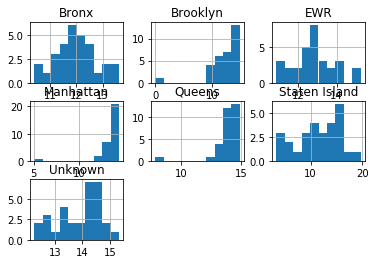

In [98]:
res.reset_index().pivot('days','Borough','timeslots').hist()

In [49]:
means_series = pd.DataFrame(res, columns=["timeslots".format(1) for i in range(0,1) ])

In [139]:
#https://stackoverflow.com/questions/41323495/plotting-in-pandas-no-property-kind-when-using-subplots?rq=1
'''

fig, tg = plt.subplots(1)
N = 31
df.plot(x='days', y='Borough', kind="bar", ax=tg)

labels, skip = ['']*N, 24
labels[skip//2::skip] = df['days'][skip//2::skip]
tg.set_xticklabels(labels)

fig.autofmt_xdate()
plt.show()
'''

'\n\nfig, tg = plt.subplots(1)\nN = 31\ndf.plot(x=\'days\', y=\'Borough\', kind="bar", ax=tg)\n\nlabels, skip = [\'\']*N, 24\nlabels[skip//2::skip] = df[\'days\'][skip//2::skip]\ntg.set_xticklabels(labels)\n\nfig.autofmt_xdate()\nplt.show()\n'

In [140]:
del taxi_zones
del yellow_tz_2018_06

In [141]:
del yellow_2018_06
